In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats

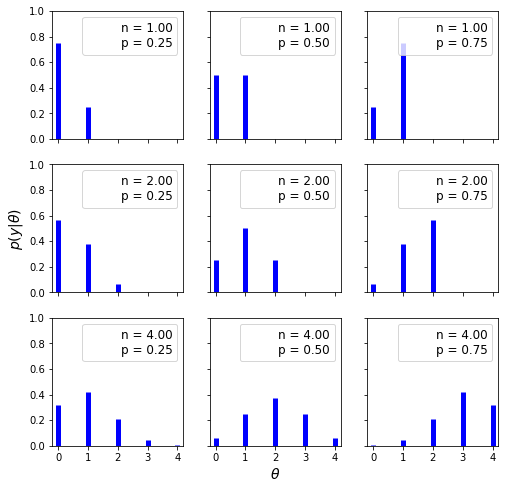

In [22]:
n_params = [1, 2, 4]
p_params = [0.25, 0.5, 0.75]
x = np.arange(0, max(n_params) + 1)
f, ax = plt.subplots(len(n_params), len(p_params), figsize=(8,8),sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i, j].vlines(x, 0, y, colors="b", lw=5)
        ax[i, j].set_ylim(0,1)
        ax[i, j].plot(0, 0, label="n = {:3.2f}\np = {:3.2f}".format(n,p), alpha=0)
        ax[i, j].legend(fontsize=12)
    ax[2, 1].set_xlabel("$\\theta$", fontsize=14)
    ax[1, 0].set_ylabel("$p(y|\\theta)$", fontsize=14)
    ax[0, 0].set_xticks(x)
    

Text(0, 0.5, '$p(\\theta)$')

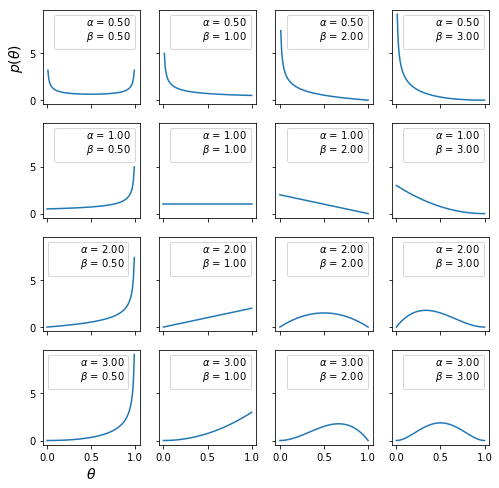

In [26]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), figsize=(8, 8), sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i, j].plot(x, y)
        ax[i, j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i, j].legend(fontsize=10)
ax[3, 0].set_xlabel("$\\theta$", fontsize=14)
ax[0, 0].set_ylabel("$p(\\theta)$", fontsize=14)